# 데이터 불러오기

In [ ]:
# 캐글 설치
!pip install -q kaggle

In [ ]:
# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/
# kaggle.josn .kaggle로 복사
!cp kaggle.json ~/.kaggle/
# 복사 확인
!ls ~/.kaggle

kaggle.json


In [ ]:
cd ~

/root


In [ ]:
# 파일 권한 변경 : 읽기, 쓰기, 실행 (rwx)
!chmod 600 .kaggle/kaggle.json

In [ ]:
cd /content

/content


In [ ]:
#downloading dataset
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

 99% 2.57G/2.59G [00:17<00:00, 162MB/s]
100% 2.59G/2.59G [00:17<00:00, 157MB/s]


In [ ]:
!unzip -q ham1000-segmentation-and-classification

In [ ]:
# !mkdir /content/img

In [ ]:
# !mv /content/ham1000-segmentation-and-classification.zip /content/img/

In [ ]:
# %cd /content/img

In [ ]:
# !unzip ham1000-segmentation-and-classification.zip

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 라이브러리 셋팅

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as tf
from random import shuffle
from PIL import Image
import numpy as np 
import shutil
import cv2
import os
import tensorflow as tf
from tqdm import tqdm
import tensorflow_datasets as tfds
from keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Input, MaxPool2D, Conv2DTranspose, Add, Flatten, Dense
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.layers import Dropout
from keras.layers import concatenate
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# 데이터 전처리

In [ ]:
# 데이터셋 개수 확인
print(len(os.listdir('/content/images')))
print(len(os.listdir('/content/masks')))

10017
10015


## 이미지 경로 리스트 생성



```
# 이미지 경로 리스트 만들기 
img_name = os.listdir('/content/images') # 텍스트 파일등 다른게 2개 더 들어있어서 나중에 오류날수 있음 
label_name = os.listdir('/content/masks')

train_path_list = []
label_path_list = []

for i in label_name:
  train_path_list.append('/content/images/' + i[:12] + '.jpg')
  label_path_list.append('/content/masks/'+ i)


```



In [ ]:
# 이미지 경로 리스트 만들기 

import os

input_dir = "/content/images"
target_dir = "/content/masks"


input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ] )

In [ ]:
# train_image = []

# for path in tqdm(input_img_paths[:1000]):
#   image = cv2.imread(path)
#   image = cv2.resize(image, (512,512))
#   image = image/255.0
#   train_image.append(image)

# # label_num[:1000]

이미지 쉐이프 검수 

```
for path in train_path_list:
    image = cv2.imread(path)
    if image.shape[-1] != 3:
        print('컬러 이미지 아님')

```

```
for path in label_path_list:
    image = cv2.imread(path)
    if image.shape[-1] != 1:
        print('흑백 이미지 아님')

```

```
for path in label_path:
    image = cv2.imread(path)
    if image.shape[-1] != 3:
        print(f'{path}')

```


```
for path in label_path_list:
    image = cv2.imread(path)
    uni = np.unique(image)
    if len(uni) != 2:
      print(f'{path}')
```



이미지 경로 확장자 이상유무 검수
``` 
def path_inspecting(train_path_list,label_path_list):

  train_data_path_list,label_data_path_list = [],[]

  for i,j in zip(train_path_list,label_path_list):
    k1, k2 = i.split('.'), j.split('.') 
    if k1[-1] == 'jpg' and k2[-1] == 'png':
      train_data_path_list.append(i)
      label_data_path_list.append(j)
    else:
      print('error')

  return train_data_path_list, label_data_path_list

path_inspecting(train_path_list,label_path_list)
print(len(train_data_path_list),len(label_data_path_list))
```






[성재] [오후 2:06] 안돼 미친놈아

[성재] [오후 2:06] 이미 450 600 3인데

[성재] [오후 2:06] 어떻게 450 600 1이 될수잇겟어

[성재] [오후 2:06] 그걸 찍어서

[성재] [오후 2:06] 왜 3인지

[성재] [오후 2:06] 값을 찍어봐

[성재] [오후 2:06] 이게 픽셀 라벨값마다

[성재] [오후 2:06] 채널 나눠놨을수도 있고

[성재] [오후 2:06] 처리 잘해야함

[성재] [오후 2:06] 걍 무지성으로 바꾸면

[성재] [오후 2:06] 또 에러나고

[성재] [오후 2:06] 혹여라도 에러 안나도

[성재] [오후 2:07] 모델 훈련할떄 수렴이 안됨


[성재] [오후 2:08] 일단

[성재] [오후 2:08] 마스크가 왜 3채널인지를 먼저 봐야해

[성재] [오후 2:08] 정말 잘 정제된 데이터라면

[성재] [오후 2:08] 그럴수도있음

[성재] [오후 2:08] 왜인지는 알지?

[성재] [오후 2:08] 0번째 채널 -> 배경

[성재] [오후 2:08] 1번째 채널 -> 병변 부위

[성재] [오후 2:08] 2번째 채널 -> 병변과 배경의 경계선

[성재] [오후 2:08] 이럴수도있으니까




```
 각 클래스별 풀네임 
 lesion_type_dict = {
     'nv': 'Melanocytic nevi',
     'mel': 'Melanoma',
     'bkl': 'Benign keratosis-like lesions ',
     'bcc': 'Basal cell carcinoma',
     'akiec': 'Actinic keratoses',
     'vasc': 'Vascular lesions',
     'df': 'Dermatofibroma'
 }
```



## 폴더 생성 및 이미지 파일 이동

In [ ]:
labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
!mkdir /content/images/MEL
!mkdir /content/images/NV
!mkdir /content/images/BCC
!mkdir /content/images/AKIEC
!mkdir /content/images/BKL
!mkdir /content/images/DF
!mkdir /content/images/VASC

In [ ]:
df_labels = pd.read_csv('/content/GroundTruth.csv') # 일단 csv파일을 불러오고 
df_labels

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_labels = pd.read_csv('/content/GroundTruth.csv') # 일단 csv파일을 불러오고 
df_labels['image'] = df_labels['image'] +'.jpg' # 이미지의 이름에 jpg를 붙여줘서 파일 형식으로 만들어줌 

labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'] # 라벨 7개 
label_list=[]
label_num =[]
for i in range (len(df_labels)): 
    row= list(df_labels.iloc[i])  # row = ['ISIC_0024306', 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0] 이런 형태 
    del row[0] # 첫번째 원소인 'ISIC_0024306' 삭제 
    index=np.argmax(row) # argmax : 리스트 원소 중 최댓값의 인덱스 값을 얻고싶을때 사용 
    label=labels[index] # argmax로 얻은 인덱스값으로 라벨들 리스트 인덱싱으로 라벨 선택 
    label_list.append(label) # 선택한 라벨을 비어있는 라벨 리스트에 추가 
    label_num.append(index)
df_labels['label']= label_list # 데이터프레임에 라벨 추가 
df_labels['label_number'] = label_num 
df_labels=df_labels.drop(labels, axis=1)
#df_labels['label'].value_counts()

In [ ]:
# 이미지 경로 추가 
for img in df_labels['image']:
  path = '/content/images/' + img
  df_labels['img_path'] = path

In [ ]:
df_labels

,image,label,label_number,img_path
0,ISIC_0024306.jpg,NV,1,/content/images/ISIC_0034320.jpg
1,ISIC_0024307.jpg,NV,1,/content/images/ISIC_0034320.jpg
2,ISIC_0024308.jpg,NV,1,/content/images/ISIC_0034320.jpg
3,ISIC_0024309.jpg,NV,1,/content/images/ISIC_0034320.jpg
4,ISIC_0024310.jpg,MEL,0,/content/images/ISIC_0034320.jpg
...,...,...,...,...
10010,ISIC_0034316.jpg,MEL,0,/content/images/ISIC_0034320.jpg
10011,ISIC_0034317.jpg,MEL,0,/content/images/ISIC_0034320.jpg
10012,ISIC_0034318.jpg,BKL,4,/content/images/ISIC_0034320.jpg
10013,ISIC_0034319.jpg,NV,1,/content/images/ISIC_0034320.jpg


내가 필요한거 - 라벨당 이미지 경로 / 라벨 기준으로 이미지 경로 묶기

https://coding-kindergarten.tistory.com/180 

In [ ]:
grouped = df_labels['img_path'].groupby(df_labels['label']).apply(list)
grouped

label
AKIEC    [/content/images/ISIC_0034320.jpg, /content/im...
BCC      [/content/images/ISIC_0034320.jpg, /content/im...
BKL      [/content/images/ISIC_0034320.jpg, /content/im...
DF       [/content/images/ISIC_0034320.jpg, /content/im...
MEL      [/content/images/ISIC_0034320.jpg, /content/im...
NV       [/content/images/ISIC_0034320.jpg, /content/im...
VASC     [/content/images/ISIC_0034320.jpg, /content/im...
Name: img_path, dtype: object

In [ ]:
image_name = df_labels['image'].groupby(df_labels['label']).apply(list)
image_name

label
AKIEC    [ISIC_0024329.jpg, ISIC_0024372.jpg, ISIC_0024...
BCC      [ISIC_0024331.jpg, ISIC_0024332.jpg, ISIC_0024...
BKL      [ISIC_0024312.jpg, ISIC_0024324.jpg, ISIC_0024...
DF       [ISIC_0024318.jpg, ISIC_0024330.jpg, ISIC_0024...
MEL      [ISIC_0024310.jpg, ISIC_0024313.jpg, ISIC_0024...
NV       [ISIC_0024306.jpg, ISIC_0024307.jpg, ISIC_0024...
VASC     [ISIC_0024370.jpg, ISIC_0024375.jpg, ISIC_0024...
Name: image, dtype: object

In [ ]:
# 위에서 만든 라벨폴더로 라벨의 이미지들을 이동 
img_dir = '/content/images/'
for label in labels:
  image_name_list = image_name[label]
  for name in image_name_list:
    shutil.copy(img_dir + name, img_dir + label)


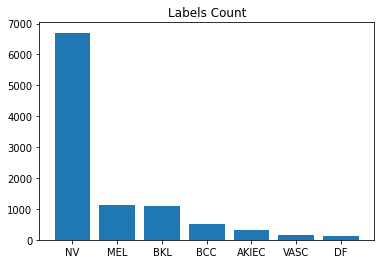

In [ ]:
labels_count = dict(df_labels['label'].value_counts())
x_label = list(labels_count.keys())
y_count = list(labels_count.values())

# 데이터셋 라벨당 갯수 
plt.figure()
plt.bar(x_label, y_count)
plt.title('Labels Count')
plt.show()

## 케라스 라이브러리로 데이터셋 생성

참고자료 - 
https://www.tensorflow.org/tutorials/images/classification?hl=ko 

tf.data.Dataset API - https://www.tensorflow.org/api_docs/python/tf/data/Dataset

tf.data: TensorFlow 입력 파이프라인 빌드  - https://www.tensorflow.org/guide/data

tf.data tutorial 번역 - https://hwiyong.tistory.com/328?category=840057

In [ ]:
import pathlib
data_dir = '/content/images'
data_dir = pathlib.Path(data_dir)
data_dir
# skins = list(data_dir.glob('*.jpg'))
# Image.open(str(skins[0]))

PosixPath('/content/images')

In [ ]:
batch_size = 16
img_height = 256
img_width = 256

# 케라스로 데이터셋 생성은 디렉토리의 폴더를 클래스, 라벨로 생성함.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.6,
  subset="training",
  seed=len(input_img_paths),
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10015 files belonging to 7 classes.
Using 4006 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=len(input_img_paths),
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10015 files belonging to 7 classes.
Using 2003 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=len(input_img_paths),
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10015 files belonging to 7 classes.
Using 2003 files for validation.


In [ ]:
# train_ds = train_ds.unbatch()
# images = list(train_ds.map(lambda x, y: x))
# labels = list(train_ds.map(lambda x, y: y))

# print(len(labels))
# print(len(images))

In [ ]:
# train_image = np.array(images)/255.0 # 일케 돌리면 cpu터진다...

In [ ]:
# train_label = np.array(labels).shape
# train_label

In [ ]:
class_names = train_ds.class_names # 폴더 이름을 기준으로 클래스 생성 

In [ ]:
class_names

['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']

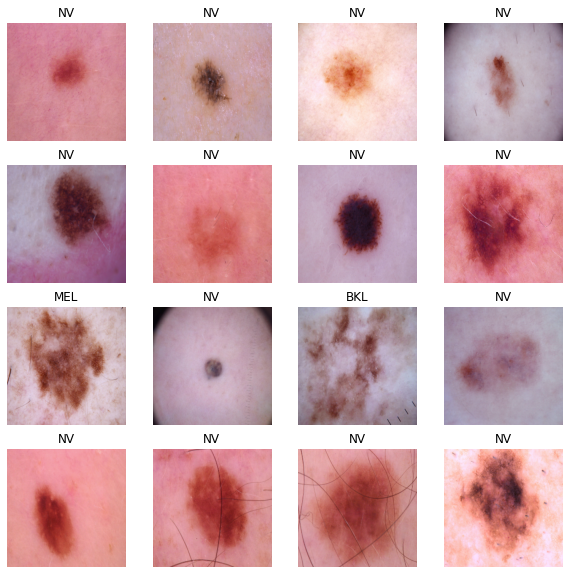

In [ ]:
# 데이터셋 이미지 시각화(및 라벨과 일치)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # .take(1)로 가져오는거라 9개를 그리려면 배치가 9이상이어야 한다 
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



```
라벨당 100개씩 뽑아내기 

df_labels_filtered = pd.DataFrame()
for label in labels: # labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'] 여기에서 하나씩 들어가서 조건 걸어서 100개씩만 뽑음.
    df_temp = df_labels[df_labels['label']==label].iloc[:100]
    df_labels_filtered = df_labels_filtered.append(df_temp)
df_labels_filtered['label'].value_counts()
df_labels_filtered
```



In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

# image_batch 및 labels_batch 텐서에서 .numpy()를 호출하여
# 이를 numpy.ndarray로 변환할 수 있습니다

(16, 256, 256, 3)
(16,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.013480393 0.9142653


## ImageDataGenerator로 데이터셋 만들기

In [ ]:
raw_train_df,valid_df = train_test_split(df_labels, test_size=0.2, stratify=df_labels['label_number'])

train_df = raw_train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.255)



# 모델링



## 커스텀 모델1 - 바닐라모델

In [ ]:
num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


# model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
#                   loss = 'sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es]
)

Epoch 1/30
251/251 [==============================] - 14s 51ms/step - loss: 1.0133 - accuracy: 0.6645 - val_loss: 0.9358 - val_accuracy: 0.6800
Epoch 2/30
251/251 [==============================] - 11s 44ms/step - loss: 0.8904 - accuracy: 0.6797 - val_loss: 0.9545 - val_accuracy: 0.6860
Epoch 3/30
251/251 [==============================] - 11s 44ms/step - loss: 0.8412 - accuracy: 0.6950 - val_loss: 0.9695 - val_accuracy: 0.7124
Epoch 4/30
251/251 [==============================] - 11s 44ms/step - loss: 0.7965 - accuracy: 0.7172 - val_loss: 0.9386 - val_accuracy: 0.7049
Epoch 4: early stopping


In [ ]:
model.evaluate(test_ds)

126/126 [==============================] - 1s 7ms/step - loss: 0.9386 - accuracy: 0.7049


[0.9385823607444763, 0.7049425840377808]

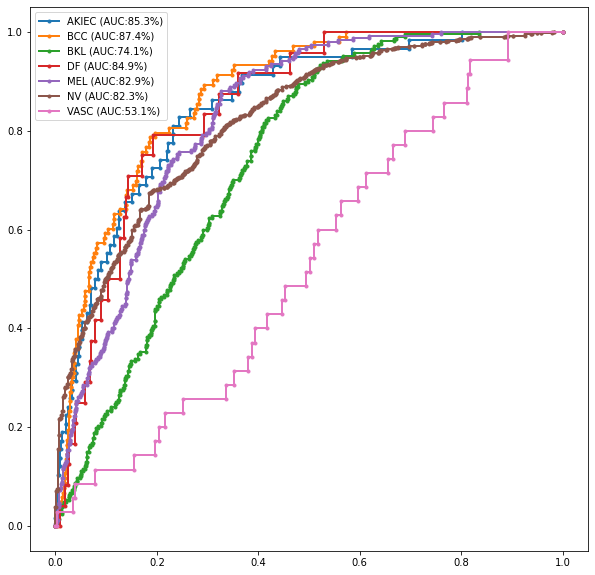

In [ ]:
ohe = OneHotEncoder(sparse=False)
tf_labels_list = []
# for images, labels in test_ds.take(1): 
for images, labels in test_ds: 
    # predict_prob=model.predict(images)
    # score = tf.nn.softmax(predict_prob)
    # predict_classes=np.argmax(predict_prob,axis=1)
    # print(predict_classes)
    # print(labels)
    tf_labels_list.append(labels)
    # print(score)
    # for i in score:
    #   print(np.max(i))
    #   y_score.append(np.max(i))

labels_list = []
for tf in tf_labels_list:
    np_labels = np.array(tf).tolist()
    for label in np_labels:
        labels_list.append(label)

test_label = np.array(labels_list).reshape(-1,1)
test_label_ohe = ohe.fit_transform(test_label)
prediction = model.predict(test_ds)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
for i, c_all in enumerate(class_names):
    tpr, fpr, thresh = roc_curve(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    auc_roc = roc_auc_score(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    ax1.plot(tpr, fpr, '.-', label='{} (AUC:{:2.1%})'.format(c_all, auc_roc), lw=2)
ax1.legend()

## 훈련 결과 시각화 

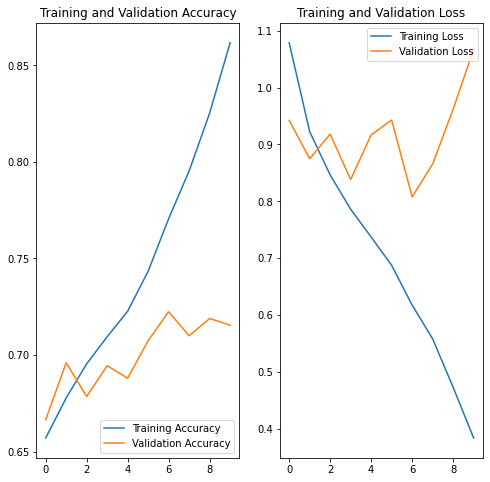

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 데이터 증강

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

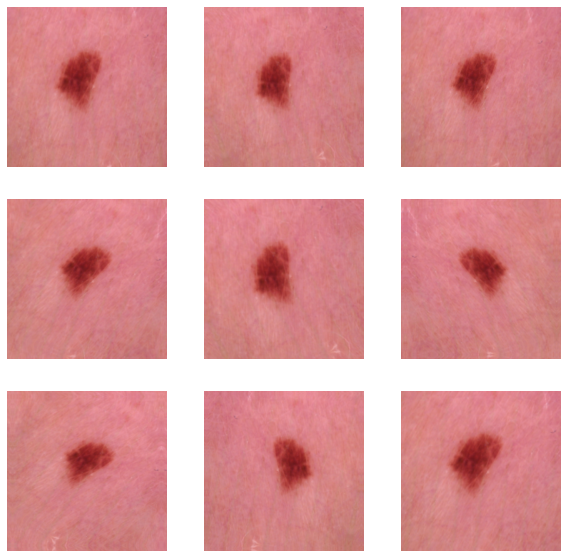

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## 커스텀모델2 - 데이터 증강 및 드랍아웃 적용

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 30
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es]
)

Epoch 1/30
251/251 [==============================] - 14s 51ms/step - loss: 1.0589 - accuracy: 0.6603 - val_loss: 0.9231 - val_accuracy: 0.6850
Epoch 2/30
251/251 [==============================] - 12s 46ms/step - loss: 0.9142 - accuracy: 0.6670 - val_loss: 0.9470 - val_accuracy: 0.6730
Epoch 3/30
251/251 [==============================] - 12s 45ms/step - loss: 0.8585 - accuracy: 0.6855 - val_loss: 0.9246 - val_accuracy: 0.7024
Epoch 4/30
251/251 [==============================] - 12s 45ms/step - loss: 0.8189 - accuracy: 0.6987 - val_loss: 0.8278 - val_accuracy: 0.7144
Epoch 5/30
251/251 [==============================] - 12s 45ms/step - loss: 0.7902 - accuracy: 0.7099 - val_loss: 0.8903 - val_accuracy: 0.7129
Epoch 6/30
251/251 [==============================] - 12s 45ms/step - loss: 0.7714 - accuracy: 0.7134 - val_loss: 0.8137 - val_accuracy: 0.7209
Epoch 7/30
251/251 [==============================] - 12s 46ms/step - loss: 0.7809 - accuracy: 0.7109 - val_loss: 0.7990 - val_accuracy:

In [ ]:
model.evaluate(test_ds)

126/126 [==============================] - 1s 7ms/step - loss: 0.8508 - accuracy: 0.7329


[0.8508147597312927, 0.7329006195068359]

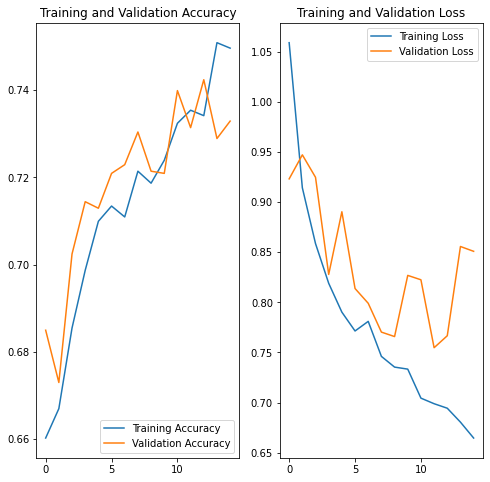

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 15
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

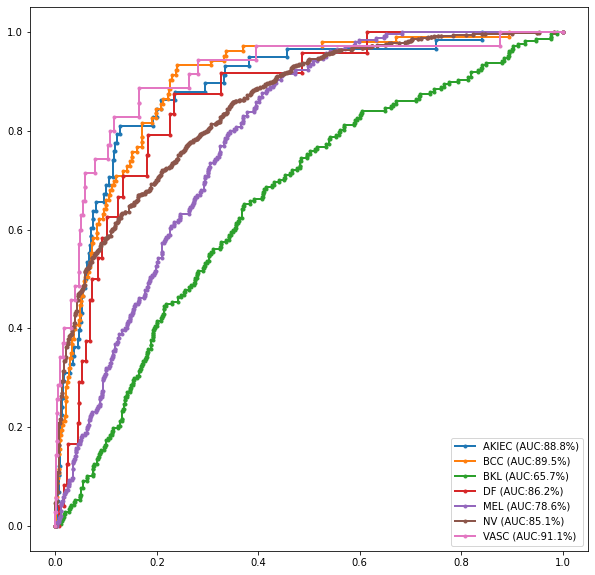

In [ ]:
ohe = OneHotEncoder(sparse=False)
tf_labels_list = []
# for images, labels in test_ds.take(1): 
for images, labels in test_ds: 
    # predict_prob=model.predict(images)
    # score = tf.nn.softmax(predict_prob)
    # predict_classes=np.argmax(predict_prob,axis=1)
    # print(predict_classes)
    # print(labels)
    tf_labels_list.append(labels)
    # print(score)
    # for i in score:
    #   print(np.max(i))
    #   y_score.append(np.max(i))

labels_list = []
for tf in tf_labels_list:
    np_labels = np.array(tf).tolist()
    for label in np_labels:
        labels_list.append(label)

test_label = np.array(labels_list).reshape(-1,1)
test_label_ohe = ohe.fit_transform(test_label)
prediction = model.predict(test_ds)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
for i, c_all in enumerate(class_names):
    tpr, fpr, thresh = roc_curve(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    auc_roc = roc_auc_score(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    ax1.plot(tpr, fpr, '.-', label='{} (AUC:{:2.1%})'.format(c_all, auc_roc), lw=2)
ax1.legend()

In [ ]:
predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions[0])

print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to NV with a 76.73 percent confidence.


## 각 이미지에 대해 예측과 예측확률 시각화

This image most likely belongs to NV with a 76.73 percent confidence.
This image most likely belongs to NV with a 76.11 percent confidence.
This image most likely belongs to NV with a 98.36 percent confidence.
This image most likely belongs to NV with a 99.97 percent confidence.
This image most likely belongs to NV with a 88.43 percent confidence.
This image most likely belongs to NV with a 99.73 percent confidence.
This image most likely belongs to NV with a 96.97 percent confidence.
This image most likely belongs to NV with a 90.05 percent confidence.
This image most likely belongs to BKL with a 40.57 percent confidence.
This image most likely belongs to NV with a 99.83 percent confidence.
This image most likely belongs to NV with a 100.00 percent confidence.
This image most likely belongs to NV with a 99.84 percent confidence.
This image most likely belongs to NV with a 91.51 percent confidence.
This image most likely belongs to NV with a 76.53 percent confidence.
This image most li

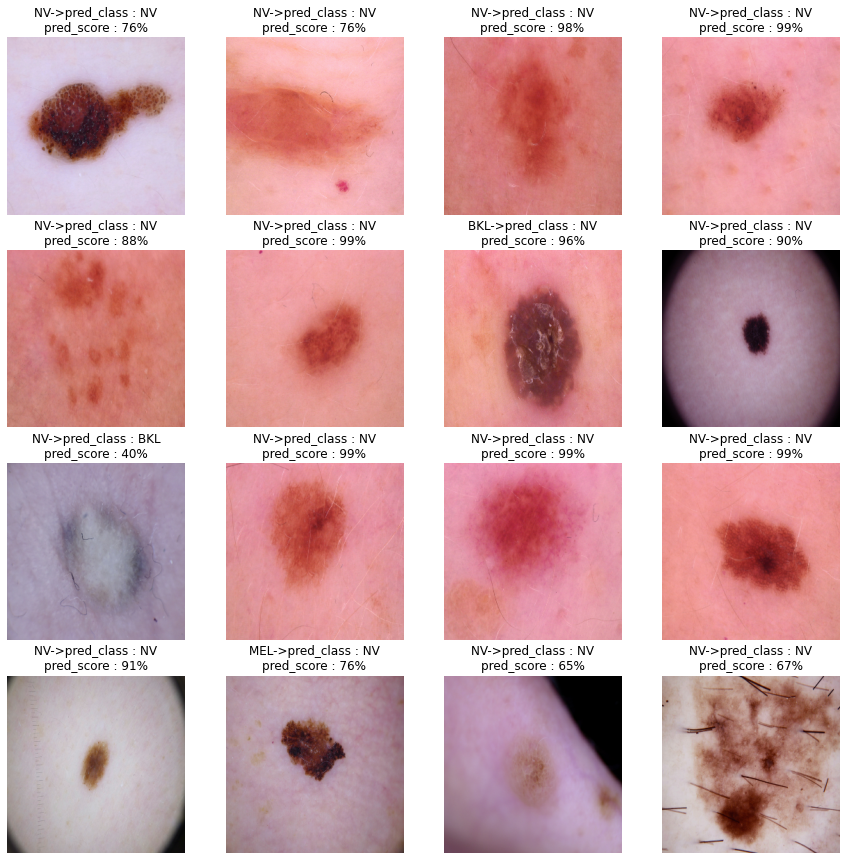

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1): 
    for i in range(16):
      predictions = model.predict(images)
      score = tf.nn.softmax(predictions[i])
      ax = plt.subplot(4, 4, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score))
)
      plt.title(class_names[labels[i]] + '->' + 
             'pred_class : ' + str(class_names[np.argmax(score)]) + '\n' + 'pred_score : '+ str(int(100 * np.max(score))) + '%')
    
      plt.axis("off")

In [ ]:
# # 임의의 파일 하나 넣어서 예측해보기
# sample_path = '/content/unnamed.jpg'

# img = keras.preprocessing.image.load_img(
#     sample_path, target_size=(img_height, img_width)
# )
# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

In [ ]:
# 공식 사이트 대회 테스트용 이미지 - 이미지만 있고 정답값이 존재하지 않으므로 사용불가.
# !gdown https://drive.google.com/uc?id=1UOyH-objqLs0oDNl8cM_k4E5zi3CgvRd
# !unzip -q ISIC2018_Task3_Test_Input


1. Test셋으로 model.evaluate()

   ㄴ 실제 테스트셋 넣고 성능 보고 시각화해보기 

      ㄴ 테스트 이미지 GroundTruth파일을 못구했기 때문에 데이터 비율을 6:2:2, 훈련, 검증, 테스트 3개 세트로 나눔. 

   ㄴ 그리고 fine-tune등 개선할 때 논문이나 예제들 참고하기

   ㄴ roc curve랑 confusion matrix를 찍을때 예측치는 서로 다름.

     그리고 multi class라서 일반적인 소스코드로는 안찍히니까 검색해서 코드 적용 해보기 
2. multi class roc curve 그래프 그리기 
3. multi class confusion matrix
4. multi class report
 



[성재] [오후 7:57] Epoch 10/10
251/251 [==============================] - 6s 23ms/step - loss: 0.3780 - accuracy: 0.8605 - val_loss: 0.4152 - val_accuracy: 0.8617


[성재] [오후 7:57] 얘만보면 랭킹 1등의 성능인데

[성재] [오후 7:57] 뭐가 문제일까요

[성재] [오후 7:58] 검증이 제대로 안됐죠 아직?

[성재] [오후 7:59] multi class roc curve도 그려봐야하고

[성재] [오후 7:59] multi class confusion matrix도 그려봐야하고

[성재] [오후 7:59] multi class report도 찍어봐야하고

[성재] [오후 7:59] 실제 테스트셋을 넣었을때

[성재] [오후 8:00] 성능을 한번 봐보고

[성재] [오후 8:00] 시각화까지 해보세요

[성재] [오후 8:00] 그리고 나서 이제

[성재] [오후 8:00] 그걸 개선할때

[성재] [오후 8:00] 다른 논문이나 그런걸

[성재] [오후 8:00] 참고하면됩니다

[성재] [오후 8:00] fine tuning을 한다던지

[성재] [오후 8:00] 내가 말해준거

[성재] [오후 8:00] 기억하지?

[성재] [오후 8:00] roc curve랑 confusion matrix를 찍을때 예측치는

[성재] [오후 8:00] 서로 다르다고

[성재] [오후 8:01] 그리고 multi class라서

[성재] [오후 8:01] 일반적인 소스코드로는 안찍히니까

[성재] [오후 8:01] 검색해서 코드 적용 해보셈

[성재] [오후 8:01] 예제 찾아서

[성재] [오후 8:01] 아마 영어로 있을거임



## 커스텀모델2 - Roc Curve

In [ ]:
ohe = OneHotEncoder(sparse=False)
tf_labels_list = []
# for images, labels in test_ds.take(1): 
for images, labels in test_ds: 
    # predict_prob=model.predict(images)
    # score = tf.nn.softmax(predict_prob)
    # predict_classes=np.argmax(predict_prob,axis=1)
    # print(predict_classes)
    # print(labels)
    tf_labels_list.append(labels)
    # print(score)
    # for i in score:
    #   print(np.max(i))
    #   y_score.append(np.max(i))

labels_list = []
for tf in tf_labels_list:
    np_labels = np.array(tf).tolist()
    for label in np_labels:
        labels_list.append(label)

test_label = np.array(labels_list).reshape(-1,1)
test_label_ohe = ohe.fit_transform(test_label)
prediction = model.predict(test_ds)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
for i, c_all in enumerate(class_names):
    tpr, fpr, thresh = roc_curve(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    auc_roc = roc_auc_score(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    ax1.plot(tpr, fpr, '.-', label='{} (AUC:{:2.1%})'.format(c_all, auc_roc), lw=2)
ax1.legend()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [ ]:
# y_score = []
tf_labels_list = []
# for images, labels in test_ds.take(1): 
for images, labels in test_ds: 
    # predict_prob=model.predict(images)
    # score = tf.nn.softmax(predict_prob)
    # predict_classes=np.argmax(predict_prob,axis=1)
    # print(predict_classes)
    # print(labels)
    tf_labels_list.append(labels)
    # print(score)
    # for i in score:
    #   print(np.max(i))
    #   y_score.append(np.max(i))

In [ ]:
labels_list = []
for tf in tf_labels_list:
    np_labels = np.array(tf).tolist()
    for label in np_labels:
        labels_list.append(label)

In [ ]:
test_label = np.array(labels_list).reshape(-1,1)
test_label_ohe = ohe.fit_transform(test_label)

In [ ]:
test_label_ohe[:,5]

array([1., 1., 1., ..., 0., 0., 1.])

In [ ]:
prediction = model.predict(test_ds)
prediction[:,1]

array([-0.64303505, -1.1984874 , -2.091817  , ...,  0.73473805,
        0.58720106,  0.502005  ], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

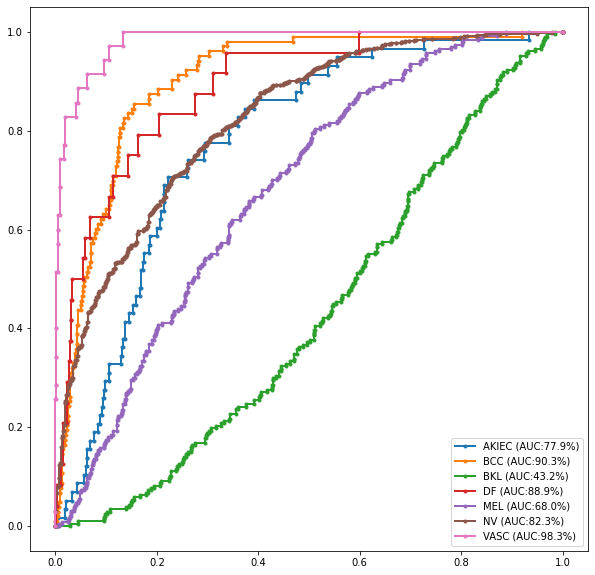

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
for i, c_all in enumerate(class_names):
    tpr, fpr, thresh = roc_curve(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    auc_roc = roc_auc_score(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    ax1.plot(tpr, fpr, '.-', label='{} (AUC:{:2.1%})'.format(c_all, auc_roc), lw=2)
ax1.legend()

In [ ]:
# train_unbatch_ds = train_ds.unbatch()
# imgs = list(train_unbatch_ds.map(lambda x, y: x))
# bels = list(train_unbatch_ds.map(lambda x, y: y))

# print(len(imgs))
# print(len(bels))

4006
4006


In [ ]:
test_label = np.array(labels).reshape(-1,1)
ohe.fit_transform(test_label)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

# 전이학습 - 분류기만 

전이학습 - https://colab.research.google.com/drive/1tJ8AoejYtNmb53xp67FkCuqBXUvAxND0?usp=sharing

In [ ]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.trainable = False
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [ ]:
last_layer = model.get_layer('conv5_block3_out').output
last_layer

<KerasTensor: shape=(None, 8, 8, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
x = tf.keras.layers.Flatten()(last_layer)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)


model = tf.keras.models.Model(model.input, output)
# model.summary()

텐서플로 콜백 함수 - https://deep-deep-deep.tistory.com/1

In [ ]:
# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = (model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[es]))

Epoch 1/50
251/251 [==============================] - 51s 170ms/step - loss: 1.3503 - accuracy: 0.6585 - val_loss: 0.9093 - val_accuracy: 0.7544
Epoch 2/50
251/251 [==============================] - 41s 161ms/step - loss: 0.7456 - accuracy: 0.7634 - val_loss: 1.0337 - val_accuracy: 0.7409
Epoch 3/50
251/251 [==============================] - 41s 160ms/step - loss: 0.6413 - accuracy: 0.8023 - val_loss: 0.9049 - val_accuracy: 0.7678
Epoch 4/50
251/251 [==============================] - 41s 161ms/step - loss: 0.3762 - accuracy: 0.8779 - val_loss: 0.6208 - val_accuracy: 0.8128
Epoch 5/50
251/251 [==============================] - 41s 160ms/step - loss: 0.2002 - accuracy: 0.9321 - val_loss: 0.8696 - val_accuracy: 0.8063
Epoch 6/50
251/251 [==============================] - 41s 161ms/step - loss: 0.1293 - accuracy: 0.9581 - val_loss: 1.0799 - val_accuracy: 0.7863
Epoch 7/50
251/251 [==============================] - 41s 161ms/step - loss: 0.1059 - accuracy: 0.9683 - val_loss: 2.9126 - val_ac

In [ ]:
model.evaluate(test_ds)

126/126 [==============================] - 6s 44ms/step - loss: 2.9126 - accuracy: 0.7564


[2.9126288890838623, 0.7563654780387878]

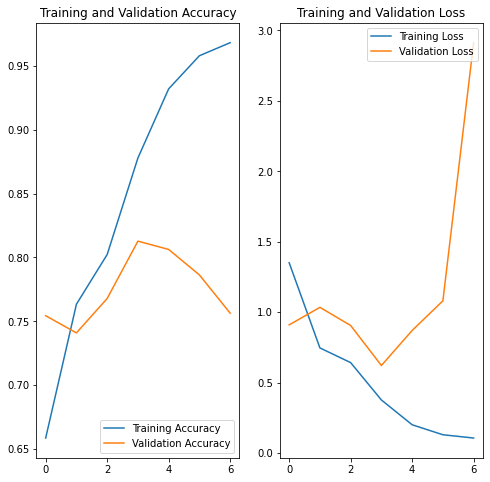

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 7
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

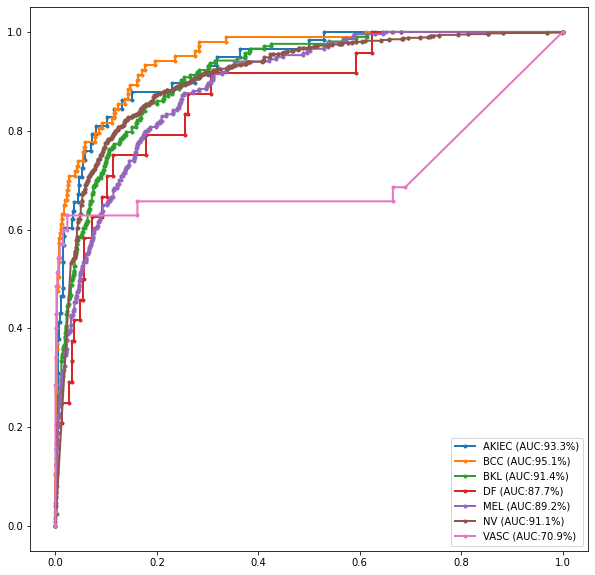

In [ ]:
ohe = OneHotEncoder(sparse=False)
tf_labels_list = []
# for images, labels in test_ds.take(1): 
for images, labels in test_ds: 
    # predict_prob=model.predict(images)
    # score = tf.nn.softmax(predict_prob)
    # predict_classes=np.argmax(predict_prob,axis=1)
    # print(predict_classes)
    # print(labels)
    tf_labels_list.append(labels)
    # print(score)
    # for i in score:
    #   print(np.max(i))
    #   y_score.append(np.max(i))

labels_list = []
for tf in tf_labels_list:
    np_labels = np.array(tf).tolist()
    for label in np_labels:
        labels_list.append(label)

test_label = np.array(labels_list).reshape(-1,1)
test_label_ohe = ohe.fit_transform(test_label)
prediction = model.predict(test_ds)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
for i, c_all in enumerate(class_names):
    tpr, fpr, thresh = roc_curve(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    auc_roc = roc_auc_score(y_true=test_label_ohe[:, i], y_score=prediction[:, i])
    ax1.plot(tpr, fpr, '.-', label='{} (AUC:{:2.1%})'.format(c_all, auc_roc), lw=2)
ax1.legend()